# Quest : NSC2_M20 Regression
- db_NHIS.NSC2_M20 in mongodb
- 연속형 타입 3가지 선택(target, label), csv 저장
- 전처리, 학습, 평가, 예측 과정 진행

### NSC2_M20.csv 생성

In [26]:
import pymongo as mg
import pandas as pd

In [27]:
client = mg.MongoClient(host='mongodb://localhost:27017')
database = client['db_NHIS']
collection = database['NSC2_M20']
cursor = collection.find({})
list_cursor = list(cursor)
df_M20=pd.DataFrame(list_cursor)
df_M20[:2]

,_id,RN_INDI,RN_KEY,RN_INST,MDCARE_STRT_DT,FORM_CD,MCARE_SUBJ_CD,SICK_SYM1,OFIJ_TYPE,OPRTN_YN,...,MCARE_RSLT_TYPE,EDC_ADD_RT,ED_RC_TOT_AMT,EDC_SBA,EDC_INSUR_BRDN_AMT,STD_YYYY,HSPTZ_PATH_TYPE,SICK_SYM2,SPCF_SYM_TYPE,FST_HSPTZ_DT
0,64e6aa403354d2e66dfa2da1,429577,2002070826167,101494,20020729,3,15,B07,0,0,...,5.0,0.15,10590,3000,7590,2002,NaN,NaN,NaN,NaN
1,64e6aa403354d2e66dfa2da2,362517,2002070388352,82780,20020729,3,14,B354,NaN,0,...,5.0,0.15,10590,3000,7590,2002,NaN,NaN,NaN,NaN


In [28]:
df_M20.to_csv("./NSC2_M20.csv")

### 연속형 타입 선택, target, label csv 저장
- 목표변수 : EDC_SBA (심결본인부담금)
- 설명변수 : MDCARE_DD_CNT (요양일수), EDC_ADD_RT (심결가산율)

In [29]:
df_M20 = pd.read_csv("./NSC2_M20.csv")
df_M20[:2]

C:\Users\01-03\AppData\Local\Temp\ipykernel_12168\3170213141.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_M20 = pd.read_csv("./NSC2_M20.csv")


,Unnamed: 0,_id,RN_INDI,RN_KEY,RN_INST,MDCARE_STRT_DT,FORM_CD,MCARE_SUBJ_CD,SICK_SYM1,OFIJ_TYPE,...,MCARE_RSLT_TYPE,EDC_ADD_RT,ED_RC_TOT_AMT,EDC_SBA,EDC_INSUR_BRDN_AMT,STD_YYYY,HSPTZ_PATH_TYPE,SICK_SYM2,SPCF_SYM_TYPE,FST_HSPTZ_DT
0,0,64e6aa403354d2e66dfa2da1,429577,2002070826167,101494,20020729,3,15,B07,0.0,...,5.0,0.15,10590,3000,7590,2002,NaN,NaN,NaN,NaN
1,1,64e6aa403354d2e66dfa2da2,362517,2002070388352,82780,20020729,3,14,B354,NaN,...,5.0,0.15,10590,3000,7590,2002,NaN,NaN,NaN,NaN


In [30]:
# 목표변수와 설명변수 추출
# 'EDC_SBA', 'MDCARE_DD_CNT', 'EDC_ADD_RT' 
drd_df_M20 = df_M20[['EDC_SBA', 'MDCARE_DD_CNT', 'EDC_ADD_RT']]
drd_df_M20.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137163 entries, 0 to 137162
Data columns (total 3 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   EDC_SBA        137163 non-null  int64  
 1   MDCARE_DD_CNT  137163 non-null  int64  
 2   EDC_ADD_RT     137163 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 3.1 MB


In [31]:
target = drd_df_M20['EDC_SBA']
labels = drd_df_M20.drop(columns=['EDC_SBA'])

In [39]:
# target[:2]
# Labels[:2]
target.shape , labels.shape

((137163,), (137163, 2))

### Preprocessing
- 결측치 : 없음
- 이상치 : 모르겠음..

In [38]:
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rc('font',family='Malgun Gothic')
mpl.rcParams['axes.unicode_minus'] = False
import seaborn as sns

In [33]:
drd_df_M20.isnull().sum()

EDC_SBA          0
MDCARE_DD_CNT    0
EDC_ADD_RT       0
dtype: int64

In [34]:
drd_df_M20.describe()

,EDC_SBA,MDCARE_DD_CNT,EDC_ADD_RT
count,1.371630e+05,137163.000000,137163.000000
mean,1.079379e+04,1.977071,0.163576
std,5.320642e+04,5.014257,0.047625
min,0.000000e+00,0.000000,0.000000
25%,2.500000e+03,1.000000,0.150000
50%,3.500000e+03,1.000000,0.150000
75%,6.000000e+03,1.000000,0.150000
max,4.431340e+06,120.000000,0.300000


In [35]:
cols = drd_df_M20.columns

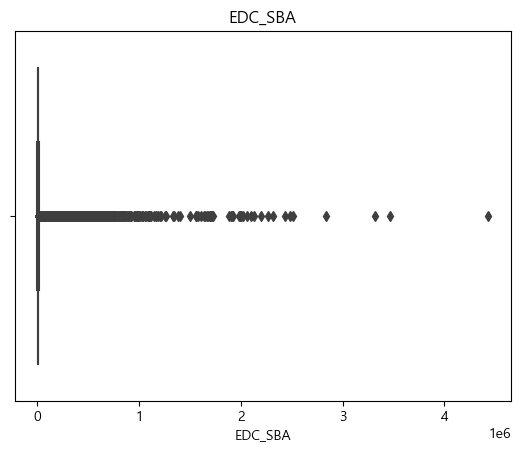

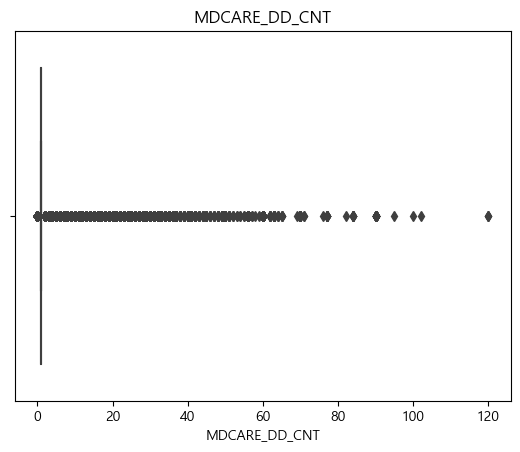

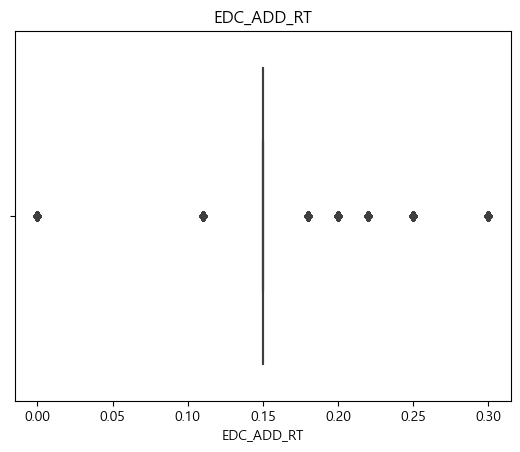

In [37]:
for item in cols :
    sns.boxplot(drd_df_M20, x=item)
    plt.title(item)
    plt.show()

### 모델(알고리즘) 학습
- target datatype 종속

In [40]:
from sklearn.linear_model import LinearRegression

In [41]:
model = LinearRegression()

In [42]:
model.fit(labels, target) # fit(설명변수, 목표변수)

LinearRegression()

### 평가

In [43]:
target_predict = model.predict(labels)
len(target_predict)

137163

In [44]:
from sklearn.metrics import r2_score

In [45]:
r2_score(target, target_predict)

0.13928586943787946

In [51]:
drd_df_M20[0:4]

,EDC_SBA,MDCARE_DD_CNT,EDC_ADD_RT
0,3000,1,0.15
1,3000,1,0.15
2,3000,1,0.15
3,3000,1,0.15


In [55]:
drd_df_M20[136003:136007]

,EDC_SBA,MDCARE_DD_CNT,EDC_ADD_RT
136003,4900,1,0.3
136004,4900,1,0.3
136005,4500,1,0.3
136006,5300,1,0.3


In [53]:
drd_df_M20[137000:137004]

,EDC_SBA,MDCARE_DD_CNT,EDC_ADD_RT
137000,212920,30,0.2
137001,236440,31,0.2
137002,223800,31,0.2
137003,209510,30,0.2


In [56]:
# 1, 0.3 : 외부에서 입력한 설명변수 값들
temp_label = [[1, 0.3]]

In [57]:
model.predict(temp_label)

C:\Users\01-03\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([36766.08222387])